In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install sentencepiece
# !pip install python-Levenshtein
# !pip install konlpy

In [ ]:
from collections import Counter
import pandas as pd
import gensim
# from konlpy.tag import Komoran
# import sentencepiece as spm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = '/content/drive/MyDrive/AIFFELTHON/data_for_git.csv'
data = pd.read_csv(data_path)

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1, inplace=False)

In [ ]:
# data.head()

In [ ]:
cd /content/drive/MyDrive/AIFFELTHON/our_module

/content/drive/MyDrive/AIFFELTHON/our_module


In [ ]:
ls

auto_test.py              create_navi_answer.py  memo_types.py
create_navi_answer.ipynb  memo_types.ipynb       __pycache__/


In [ ]:
import auto_test as at

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_te

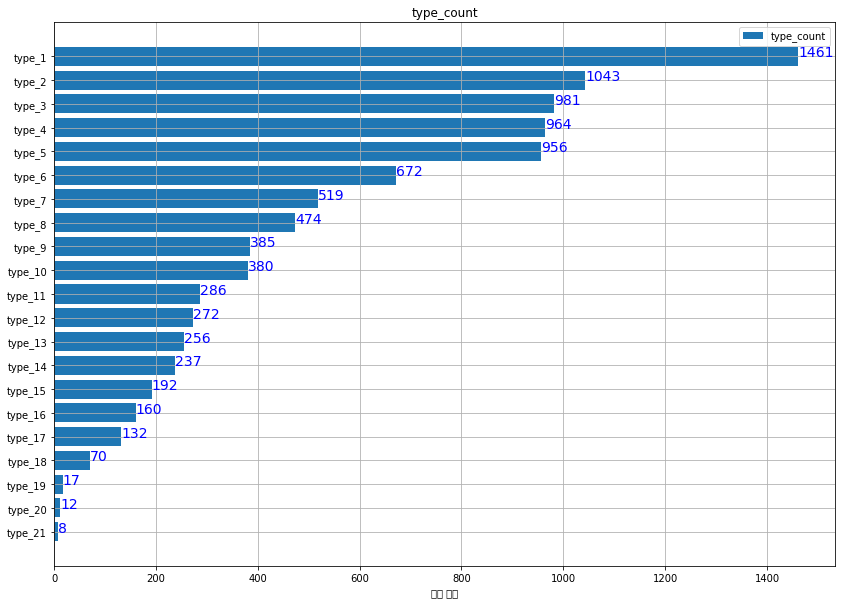

In [ ]:
check = at.get_detail_plot(data)
check.get_sub_type_plot()

In [ ]:
# check.get_detail_type_plot()

### lesion_id 수집

In [ ]:
uq_id_list = data['num'].unique()

In [ ]:
want_title = ['num', 'type', 'sentence']

In [ ]:
cut_data = data[want_title]

In [ ]:
# 공백 제거 함수
import re

def remove_space(sentence):
    while True:
        sentence = str(sentence)
        sentence = re.sub(' +', ' ', sentence) # 다중 공백 제거
        if sentence[0] == ' ': # case 1. 첫 번째 글자 공백
            sentence = sentence[1:]
        elif sentence[-1] == '\n' or sentence[-1] == ' ': # case 2. 마지막 글자 '\n'이거나 공백
            sentence = sentence[:-1]
        else:
            return(sentence)

In [ ]:
# 'memo' 전처리
for index in range(len(cut_data)):
    cut_data['sentence'][index] = remove_space(cut_data['sentence'][index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 'memo' 중복 열 제거

memo_list = []
memo_drop_list = []
for index in range(len(cut_data)):
    if cut_data['sentence'][index] in memo_list:
        memo_drop_list.append(index)
    
    else:
        memo_list.append(cut_data['sentence'][index])

memo_data = cut_data.drop(index=memo_drop_list, axis=0, inplace=False)
# memo_data.head()

In [ ]:
# len(memo_data)

In [ ]:
# len(data)

In [ ]:
# index 정렬

memo_data = memo_data.reset_index(drop = True)
# memo_data.head()

In [ ]:
# 'memo' 하나로 병합하기

my_data = []
for i in list(memo_data['num'].unique()):
    temp_summemo = []
    for j in range(len(memo_data)):
        if memo_data['num'][j] == i:
            temp_summemo.append(str(memo_data['sentence'][j]))
    temp_summemo = '\n'.join(temp_summemo)
    my_data.append(temp_summemo)

print(len(my_data))

9450


In [ ]:
# my_data[:10]

In [ ]:
len(list(memo_data['num'].unique()))

9450

In [ ]:
# len(uq_id_list)

In [ ]:
my_memo_list = list(memo_data['num'].unique())

In [ ]:
my_memo_dict = {}
for index in range(len(my_data)):
    my_memo_dict[my_memo_list[index]] = my_data[index]

In [ ]:
drop_memo = memo_data.drop_duplicates(['num'])
len(drop_memo)

9450

In [ ]:
drop_memo = drop_memo.reset_index(drop = True)
# drop_memo.head()

In [ ]:
for index in range(len(drop_memo)):
    if drop_memo['num'][index] == my_memo_list[index]:
        drop_memo['sentence'][index] = my_data[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# print(drop_memo['num'][9449])

697918


In [ ]:
# print(drop_memo['sentence'][9449])

In [ ]:
# diff_set_1 = set(list(memo_data['num'].unique()))
# diff_set_2 = set(list(uq_id_list))
# print(diff_set_2 - diff_set_1)

In [ ]:
# diff_list = list(diff_set_2 - diff_set_1)
# for i in range(len(data)):
#     if data['num'][i] in diff_list:
#         just_check_list = 

In [ ]:
drop_memo.to_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/saved_memo_data_for_git_0623.csv') #csv파일로 생성

In [ ]:
# print(drop_memo['sentence'][400])

In [ ]:
inq = []
inq_index = []
nothing = []

# 1324개
for index, sentence in enumerate(my_data):
    temp_sent = sentence.split('\n')

    start_idx = 10000
    for n, j in enumerate(temp_sent): # 한 줄 한 줄 살펴보기
        if 'ㅁ문의내용' in j or 'ㅁ 문의내용' in j or ')문의내용' in j or 'ㅁ문의 내용' in j or 'ㅁ 문의사항' in j or 'ㅁ문의사항' in j or '◎문의 내용' in j or 'ㅁ문의구분' in j or '문의내용' in j:
            start_idx = n # '문의내용'이 있는 데이터의 index
            # inq_index.append(index)

        if n > start_idx and 'ㅁ' in j: # 이후 줄에 'ㅁ'이 있다면
            inq_sep = '\n'.join(temp_sent[start_idx: n]) # '문의내용'부터 'ㅁ' 전까지 자르기
            inq.append(inq_sep)
            # print(index)
            inq_index.append(my_memo_list[index])
            break


        # if '◎문의 내용' in j:
        #     start_idx = n 
        # if n > start_idx and '◎' in j:
        #     inq_sep = '\n'.join(temp_sent[start_idx: n])
        #     inq.append(inq_sep)
        #     inq_index.append(i)
        #     break


        # if 'ㅁ문의구분' in j:
        #     start_idx = n 
        # if n > start_idx and 'ㅁ' in j:
        #     inq_sep = '\n'.join(temp_sent[start_idx: n])
        #     inq.append(inq_sep)
        #     inq_index.append(i)
        #     break

        
        # if '문의내용' in j:
        #     start_idx = n 
        # if n > start_idx and ('확' in j or 'ㅁ' in j):
        #     inq_sep = '\n'.join(temp_sent[start_idx: n])
        #     inq.append(inq_sep)
        #     inq_index.append(i)
        #     break


        # if '증상 상세내용' in j:
        #     start_idx = n 
        # if n > start_idx and 'ㅁ' in j:
        #     inq_sep = '\n'.join(temp_sent[start_idx: n])
        #     inq.append(inq_sep)
        #     inq_index.append(i)
        #     break

In [ ]:
len(inq)

7102

In [ ]:
drop_drop = list(set(my_memo_list) - set(inq_index))

In [ ]:
len(drop_drop)

2348

In [ ]:
drop_indx = []
for index in range(len(drop_memo)):
    if drop_memo['num'][index] in drop_drop:
        drop_indx.append(index)

In [ ]:
len(drop_indx)

2348

In [ ]:
moonee_data = drop_memo.drop(index=drop_indx, axis=0, inplace=False)
# moonee_data.head()

In [ ]:
moonee_data = moonee_data.reset_index(drop=True)
# moonee_data.head()

In [ ]:
# for i in range(len(inq)):
#     print(inq[i])
#     print('='*30)

In [ ]:
# inq[0]

In [ ]:
def remove_as(sentence):
    while True:
        s_loc = sentence.find('ㄴ')
        u_loc = sentence.find('-')
        st_loc = sentence.find('*')
        st2_loc = sentence.find('＊')

        # 없으면 그대로
        if s_loc == -1 and u_loc == -1 and st_loc == -1 and st2_loc == -1:
            break
        
        # 있으면 제외
        if s_loc != -1:
            sentence = sentence[:s_loc] + sentence[s_loc+1:]
        if u_loc != -1:
            sentence = sentence[:u_loc] + sentence[u_loc+1:]
        if st_loc != -1:
            sentence = sentence[:st_loc] + sentence[st_loc+1:]
        if st2_loc != -1:
            sentence = sentence[:st2_loc] + sentence[st2_loc+1:]

    return sentence


In [ ]:
inq_ans = []
cnt=0

for line in inq:
    line = line.split('\n')
    for i, sen in enumerate(line):
        if '문의내용' in sen or '문의 내용' in sen or '문의사항' in sen or '문의구분' in sen:
            new = line[i+1:]
            new = '\n'.join(new)
            new = remove_as(new)
            inq_ans.append(new)
            break

print(len(inq_ans))

7102


In [ ]:
# for i in range(len(inq_ans[:30])):
#     print(inq_ans[i])
#     print('='*30)

In [ ]:
# inq_ans[4]

In [ ]:
inq_index[0]

632099

In [ ]:
import re

def remove_space(sentence):
    while True:
        sentence = re.sub(' +', ' ', sentence) # 다중 공백 제거
        if sentence == '':
            break
        # if sentence == ' ':
        #     continue
        # if len(sentence) == 1:
        #     return(sentence)    
        if sentence[0] == ' ': # case 1. 첫 번째 글자 공백
            sentence = sentence[1:]
        elif sentence[-1] == '\n' or sentence[-1] == ' ': # case 2. 마지막 글자 '\n'이거나 공백
            sentence = sentence[:-1]
        else:
            return(sentence)

In [ ]:
my_q = []
my_q_index = []
for index, sen in enumerate(inq_ans):
    if sen == '': # 빈 문자열이라면 for문으로 다시 돌아감
        continue
    # if remove_space(sen) == '':
    #     continue
    my_q.append(remove_space(sen)) # 빈 문자열 아니라면 공백 제거
    my_q_index.append(inq_index[index])

In [ ]:
# for i in my_q[:10]:
#     print(i)
#     print('='*30)

In [ ]:
len(my_q)

5842

In [ ]:
len(my_q_index)

5842

In [ ]:
inq[100]

'ㅁ문의내용\nㄴ고객 운전석 시트높이조절 장치 파손으로 인입/ 운행하는데 너무 불편하다고 하심\n'

In [ ]:
len(inq_index)

7102

In [ ]:
inq_index[0]

632099

In [ ]:
drop_drop_2 = list(set(inq_index) - set(my_q_index))

In [ ]:
len(drop_drop_2)

1260

In [ ]:
drop_indx_2 = []
for index in range(len(moonee_data)):
    if moonee_data['num'][index] in drop_drop_2:
        drop_indx_2.append(index)

In [ ]:
len(drop_indx_2)

1260

In [ ]:
drop_indx_2[1200:1210]

[6800, 6811, 6817, 6832, 6833, 6834, 6835, 6837, 6838, 6844]

In [ ]:
moonee_q = moonee_data.drop(index=drop_indx_2, axis=0, inplace=False)
# moonee_q.head()

In [ ]:
moonee_q = moonee_q.reset_index(drop=True)
# moonee_q.head()

In [ ]:
len(moonee_q)

5842

In [ ]:
len(my_q)

5842

In [ ]:
true_count = 0
for index in range(len(moonee_q)):
    if my_q_index[index] == moonee_q['num'][index]:
        true_count += 1

In [ ]:
true_count

5842

In [ ]:
moonee_q_done = moonee_q.copy()
for index in range(len(moonee_q)):
    moonee_q_done['sentence'][index] = my_q[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# for i in range(len(moonee_q_done[:20])):
#     print(moonee_q_done['sentence'][i])
#     print('==='*30)

In [ ]:
# moonee_q_done.head()

In [ ]:
moonee_qna_dict = {
    'inquiry' : list(moonee_q_done['sentence']),
    'sub_type' : list(moonee_q_done['type']),
}

moonee_qna = pd.DataFrame(moonee_qna_dict)

In [ ]:
# moonee_qna.head()

In [ ]:
moonee_qna.to_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set_for_git_0623.csv') #csv파일로 생성

In [ ]:
# moonee_qna.to_excel('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.xlsx') #xlsx파일로 저장